In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
# idx         :   0         1           2     3    4     5    6     7      8     9
# class_name  : airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck 

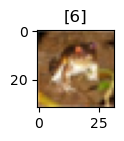

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0])
plt.title(y_train[0])
plt.show()

In [7]:
# Normalize the data
X_train = X_train / 255.
X_test = X_test / 255.

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout

In [9]:
# Dynamic Hyperparameter Tuning for CNN model
from tensorflow import keras
from keras import layers
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))
    
    for i in range(hp.Int('cov_blocks', 1 , 3 , default = 2)):
        model.add(layers.Conv2D(
            filters = hp.Int(f'filter_{i}', 16, 128, step=16),
            kernel_size = hp.Choice(f'kernel_size{i}', [3, 5]),
            activation = 'relu', padding = 'same'
        ))
        model.add(layers.MaxPool2D())
        if hp.Boolean(f"dropout_{i}"):
            model.add(layers.Dropout(rate=0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int("dense_units", 64, 256, step=64),
        activation='relu'
    ))
    model.add(layers.Dropout(rate=hp.Float("dropout_dense", 0.2, 0.5, step=0.1)))
    model.add(layers.Dense(10, activation='softmax')) # output layer

    model.compile(optimizer=keras.optimizers.Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
    return model

In [10]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=3, 
                        directory='mydir', project_name = 'cifar10')
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 3 Complete [00h 05m 09s]
val_accuracy: 0.6467000246047974

Best val_accuracy So Far: 0.6467000246047974
Total elapsed time: 00h 12m 40s


In [11]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

print("Best hyperparameters:")
for key, value in best_hp.values.items():
    print(f"{key}: {value}")

Best hyperparameters:
cov_blocks: 1
filter_0: 96
kernel_size0: 3
dropout_0: True
filter_1: 112
kernel_size1: 3
dropout_1: False
dense_units: 256
dropout_dense: 0.30000000000000004
filter_2: 16
kernel_size2: 5
dropout_2: True


/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [12]:
model = Sequential()

# Convolutional Neural Network
model.add(Conv2D(96, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(112, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Dropout(rate=0.25)) # remove some neurons to avoid overfitting
model.add(Flatten())

# Fully Connected ANN
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 112)    │        96,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 112)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 16)       │        16,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,922 (527.04 KB)

 Trainable params: 134,922 (527.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.2301 - loss: 2.0255
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.4144 - loss: 1.5821
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.4787 - loss: 1.4167
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.5225 - loss: 1.3182
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.5358 - loss: 1.2533
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.5736 - loss: 1.1794
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.5930 - loss: 1.1329
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.6092 - loss: 1.0870
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6208 - loss: 1.0500
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.6350 - loss: 1.0217


In [14]:
from tensorflow.keras.utils import load_img, img_to_array
pil = load_img('horse.png', target_size=(32,32))
image = img_to_array(pil)
image = image/255.0 # normalization
image = np.expand_dims(image, axis=0)
model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[7.6309270e-09, 4.9096213e-11, 1.2108052e-06, 3.8136318e-07,
        1.0951714e-03, 2.5412530e-05, 6.3972862e-11, 9.9887782e-01,
        4.1350942e-12, 8.0176954e-10]], dtype=float32)

In [15]:
(model.predict(image) > 0.5).astype("int")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [16]:
pil = load_img('truck.png', target_size=(32,32))
image = img_to_array(pil)
image = image/255.0 # normalization
image = np.expand_dims(image, axis=0)
model.predict(image)
(model.predict(image) > 0.5).astype("int")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])